In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,classification_report

In [9]:
df=pd.read_csv('/content/wineQualityReds.csv',index_col='Unnamed: 0')
df.head(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


<Axes: >

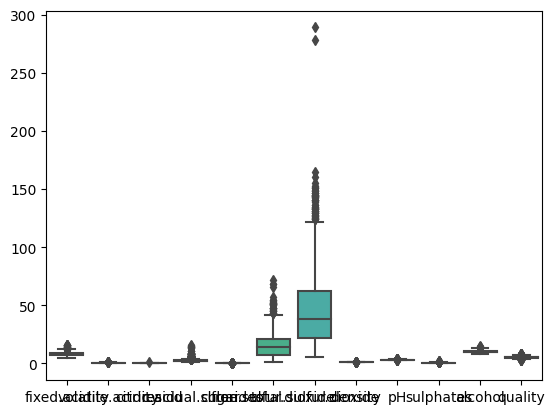

In [12]:
sns.boxplot(df)

array([[<Axes: title={'center': 'fixed.acidity'}>,
        <Axes: title={'center': 'volatile.acidity'}>,
        <Axes: title={'center': 'citric.acid'}>],
       [<Axes: title={'center': 'residual.sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free.sulfur.dioxide'}>],
       [<Axes: title={'center': 'total.sulfur.dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

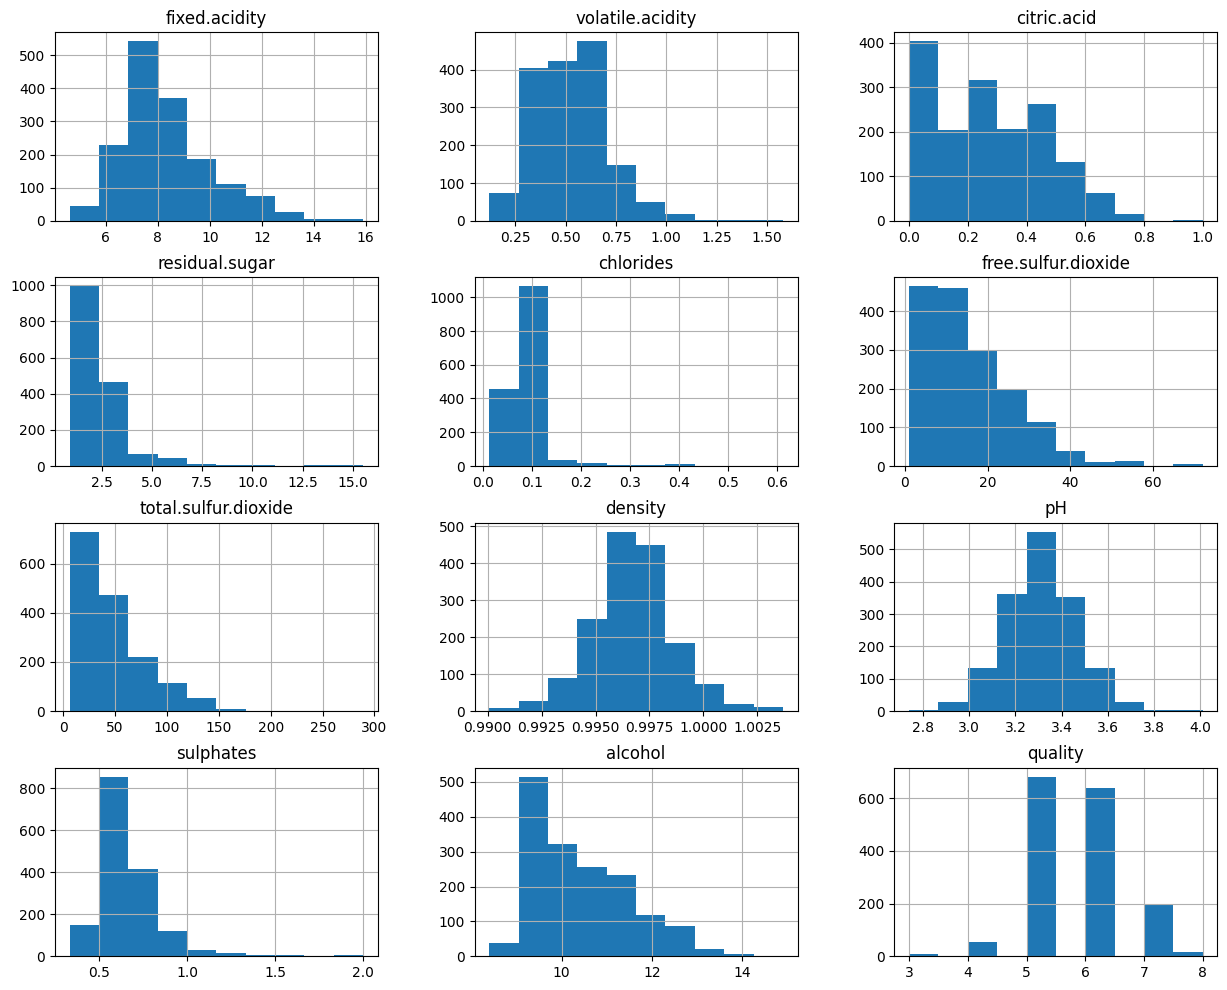

In [14]:
df.hist(figsize=(15,12))

In [23]:
x=df.drop(columns='alcohol')
x


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5
...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,5


In [24]:
y=df.alcohol
y

1        9.4
2        9.8
3        9.8
4        9.8
5        9.4
        ... 
1595    10.5
1596    11.2
1597    11.0
1598    10.2
1599    11.0
Name: alcohol, Length: 1599, dtype: float64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)



In [30]:
svm=SVR()
svm.fit(x_train,y_train)

SVR()

In [31]:
y_pred=svm.predict(x_train)

In [34]:
print(svm.score(x_train,y_train)*100)
print(svm.score(x_test,y_test)*100)

14.461963376254527
13.04415455777802


In [36]:
sc=StandardScaler()
new_xtrain=sc.fit_transform(x_train)
new_xtest=sc.fit_transform(x_test)

In [38]:
svm1=SVR()
svm1.fit(new_xtrain,y_train)
svm1.score(new_xtrain,y_train)*100

84.44844744637697

In [39]:
x_new=sc.transform(x)
x_new

array([[-0.48123374,  1.10217226, -1.39006001, ...,  1.24245154,
        -0.64596254, -0.78474886],
       [-0.25443728,  2.19891792, -1.39006001, ..., -0.74547092,
         0.17485022, -0.78474886],
       [-0.25443728,  1.46775415, -1.18115114, ..., -0.36071174,
        -0.03035297, -0.78474886],
       ...,
       [-1.104924  , -0.05550371, -0.7111062 , ...,  0.66531276,
         0.65365766,  0.53693343],
       [-1.33172046,  0.76705554, -0.76333341, ...,  1.62721073,
         0.38005341, -0.78474886],
       [-1.27502135, -1.27411   ,  1.06461917, ...,  0.47293317,
         0.03804809,  0.53693343]])

In [45]:
x_train1,x_test1,y_train1,y_test1= train_test_split(x_new,y,test_size=.2)

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
svm2=SVR()

In [48]:
svm2.fit(x_train1,y_train1)

SVR()

In [51]:
y_pred1=svm2.predict(x_test1)

In [54]:
r2=r2_score(y_test1,y_pred1)
r2

0.8056230585599187

In [55]:
mse=mean_squared_error(y_test1,y_pred1)
mse

0.22842050145367937

In [57]:
mae=mean_absolute_error(y_test1,y_pred1)
mae

0.3463151645019138

In [59]:
svm3=SVR()

In [60]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}


In [65]:
gs=GridSearchCV(svm3,param_grid,cv=10,scoring='neg_mean_squared_error',verbose=1)
gs.fit(x_train1,y_train1)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=1)

In [66]:
gs.best_params_


{'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}

In [69]:
svm4=SVR(C=10,epsilon=0.2,kernel='rbf')

In [70]:
svm4.fit(x_train1,y_train1)

SVR(C=10, epsilon=0.2)

In [71]:
y_pred2=svm4.predict(x_test1)

In [72]:
print(svm4.score(x_train1,y_train1))

0.9147779691762836


In [73]:
mse1= mean_squared_error(y_test1, y_pred2)
print("Mean Squared Error on Test Set:",mse1)

Mean Squared Error on Test Set: 0.24703718595991903


In [76]:
print("r2_score=",r2_score(y_test1,y_pred2))

r2_score= 0.7897809858429405
